<a href="https://colab.research.google.com/github/syed-hub111/sample_project_/blob/main/urban_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4682 - loss: 0.9301
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 1.0000 - loss: 0.0559
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 6.6027e-04
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 2.1290e-05
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 4.8868e-06


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


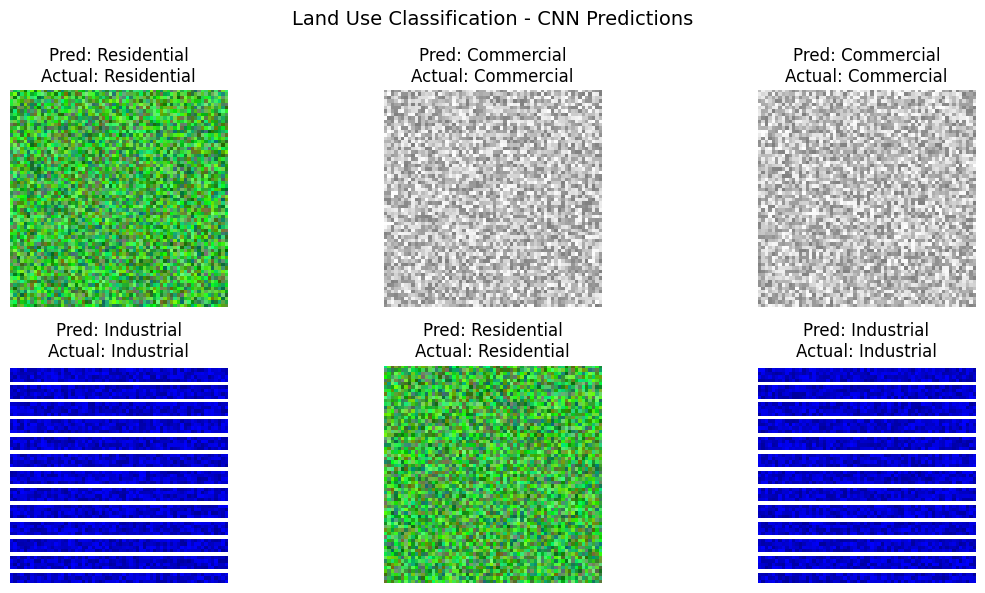

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 91148.4844
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 91570.9844
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 91410.9766
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 92848.9219
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 88932.7188 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


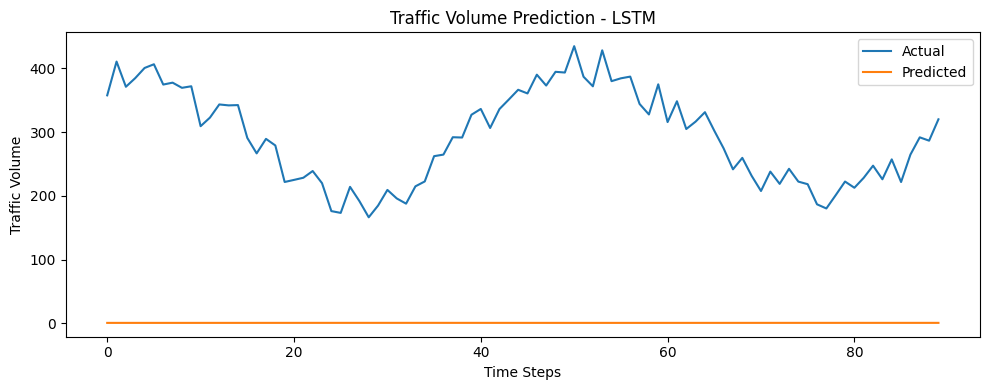

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CSV image data
df_img = pd.read_csv('land_use_images.csv')  # Update path if needed
labels = df_img['label'].values
images = df_img.drop('label', axis=1).values
images = images.reshape(-1, 64, 64, 3)
images = images / 255.0 if images.max() > 1.0 else images

# One-hot encode labels
y_img = to_categorical(labels, num_classes=3)
classes = ['Residential', 'Commercial', 'Industrial']

# Train/test split
X_train, X_test, y_train, y_test, y_train_raw, y_test_raw = train_test_split(
    images, y_img, labels, test_size=0.2
)

# CNN model
cnn = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

# Predictions and visualization
preds = cnn.predict(X_test)
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {classes[pred_labels[i]]}\nActual: {classes[y_test_raw[i]]}")
plt.suptitle("Land Use Classification - CNN Predictions", fontsize=14)
plt.tight_layout()
plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Load CSV traffic data
df_traffic = pd.read_csv('traffic_data.csv')  # Update path if needed
traffic = df_traffic['volume'].values.astype(float)

# Prepare sequence data
window = 10
X_traffic, y_traffic = [], []
for i in range(len(traffic) - window):
    X_traffic.append(traffic[i:i + window])
    y_traffic.append(traffic[i + window])

X_traffic = np.array(X_traffic).reshape(-1, window, 1)
y_traffic = np.array(y_traffic)

# LSTM model
lstm = Sequential([
    LSTM(50, input_shape=(window, 1)),Dense(1)
])
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_traffic, y_traffic, epochs=5, verbose=1)

# Predictions
predicted = lstm.predict(X_traffic)

# Plot results
plt.figure(figsize=(10, 4))
plt.plot(y_traffic, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("Traffic Volume Prediction - LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Volume")
plt.legend()
plt.tight_layout()
plt.show()